<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Flights Data Base
</h1>

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

**Variables**
- *`Loyalty#`* - Unique customer identifier linking to CustomerDB;
- *`Year`* -  Year of flight activity record;
- *`Month`* -  Month of flight activity record (1-12);
- *`YearMonthDate`* -  First day of the month for the activity period;
- *`NumFlights`* - Total number of flights taken by customer in the month;
- *`NumFlightsWithCompanions`* - Number of flights where customer traveled with companions;
- *`DistanceKM`* - Total distance traveled in kilometers for the month;
- *`PointsAcumulated`* - Loyalty points earned by customer during the month;
- *`PointsRedeemed`* - Loyalty points spent/redeemed by customer during the month;
- *`DollarsCostPointsRedeemed`* - Dollar value of points redeemed during the month;

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Importing Libraries
</h1>

In [106]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Reading the Data
</h1>

In [107]:
# Loading the dataset
df_flights = pd.read_csv('C:/Users/mariana/Documents/Data Mining/DM_AIAI_FlightsDB.csv', delimiter=',', header=0, decimal='.', quotechar='"')

In [108]:
# Displaying the first five rows of the dataframe
df_flights.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [109]:
# Displaying the last five rows of the dataframe
df_flights.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Initial Analysis
</h1>

In [110]:
# Checking shape of dataframe
df_flights.shape

(608436, 10)

In [111]:
# Checking the info of the dataframe
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [112]:
# Getting a statistical summary of the dataframe
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.000,772194.0000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [113]:
# Checking for missing values
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [114]:
# Checking for duplicate rows
df_flights.duplicated().sum()

np.int64(2903)

In [115]:
# replace "" by nans
df_flights.replace("", np.nan, inplace=True)

# Count of missing values
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [116]:
# Passar a coluna "YearMonthDate" para o formato datetime
df_flights["YearMonthDate"] = pd.to_datetime(df_flights["YearMonthDate"])

In [117]:
df_flights.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
Loyalty#,608436.0,550037.873084,100018.0,326961.0,550834.0,772194.0,999986.0,258935.180575
Year,608436.0,2020.0,2019.0,2019.0,2020.0,2021.0,2021.0,0.816497
Month,608436.0,6.5,1.0,3.75,6.5,9.25,12.0,3.452055
YearMonthDate,608436,2020-06-16 02:40:00,2019-01-01 00:00:00,2019-09-23 12:00:00,2020-06-16 00:00:00,2021-03-08 18:00:00,2021-12-01 00:00:00,NaN
NumFlights,608436.0,3.908107,0.0,0.0,0.0,7.2,21.0,5.057889
NumFlightsWithCompanions,608436.0,0.983944,0.0,0.0,0.0,0.9,11.0,2.003785
DistanceKM,608436.0,7939.341419,0.0,0.0,856.4,15338.175,42040.0,10260.421873
PointsAccumulated,608436.0,793.777781,0.0,0.0,85.275,1533.7125,4204.0,1025.918521
PointsRedeemed,608436.0,235.251678,0.0,0.0,0.0,0.0,7496.0,983.233374
DollarCostPointsRedeemed,608436.0,2.324835,0.0,0.0,0.0,0.0,74.0,9.725168


<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Numeric Variables' Univariate Distribution
</h1>

In [118]:
# Creating a list with the names of the metric features
metric_features = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

<h2 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Histagrams
</h2>

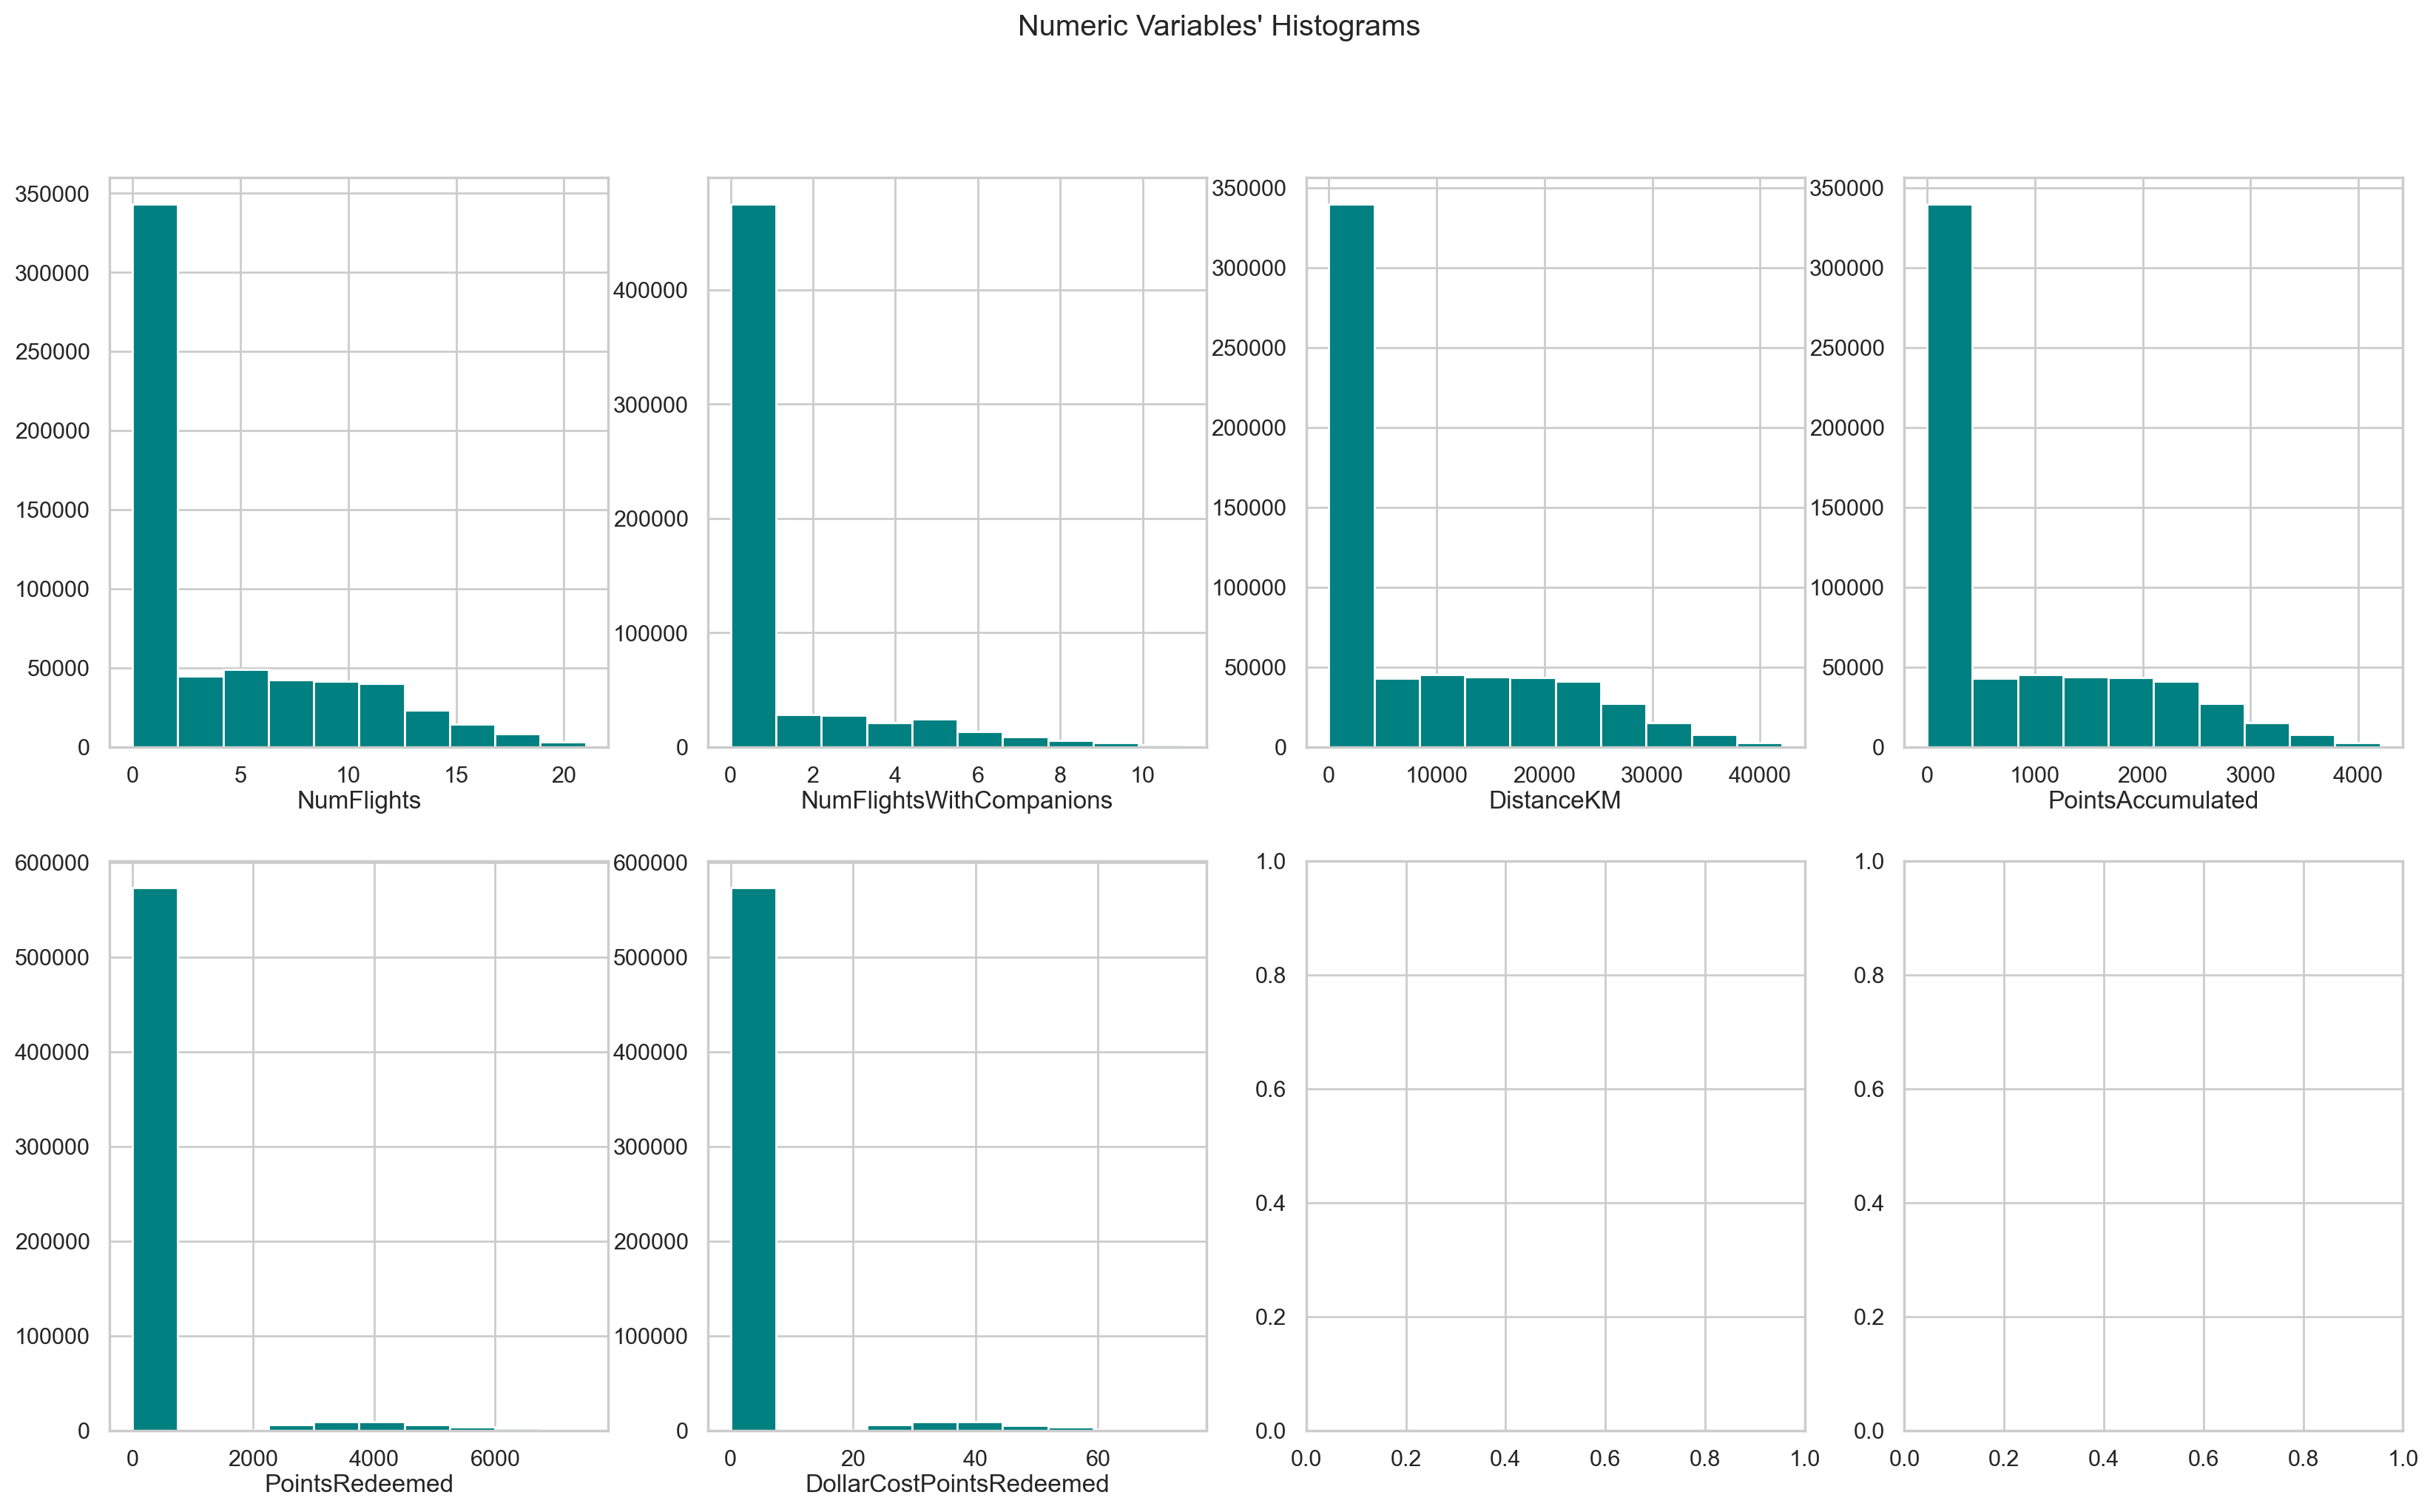

In [119]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")

sp_rows = 2
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data ax.hist(df_train[feat], color=("purple"))
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df_flights[feat], color=("teal"))
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)



plt.show()

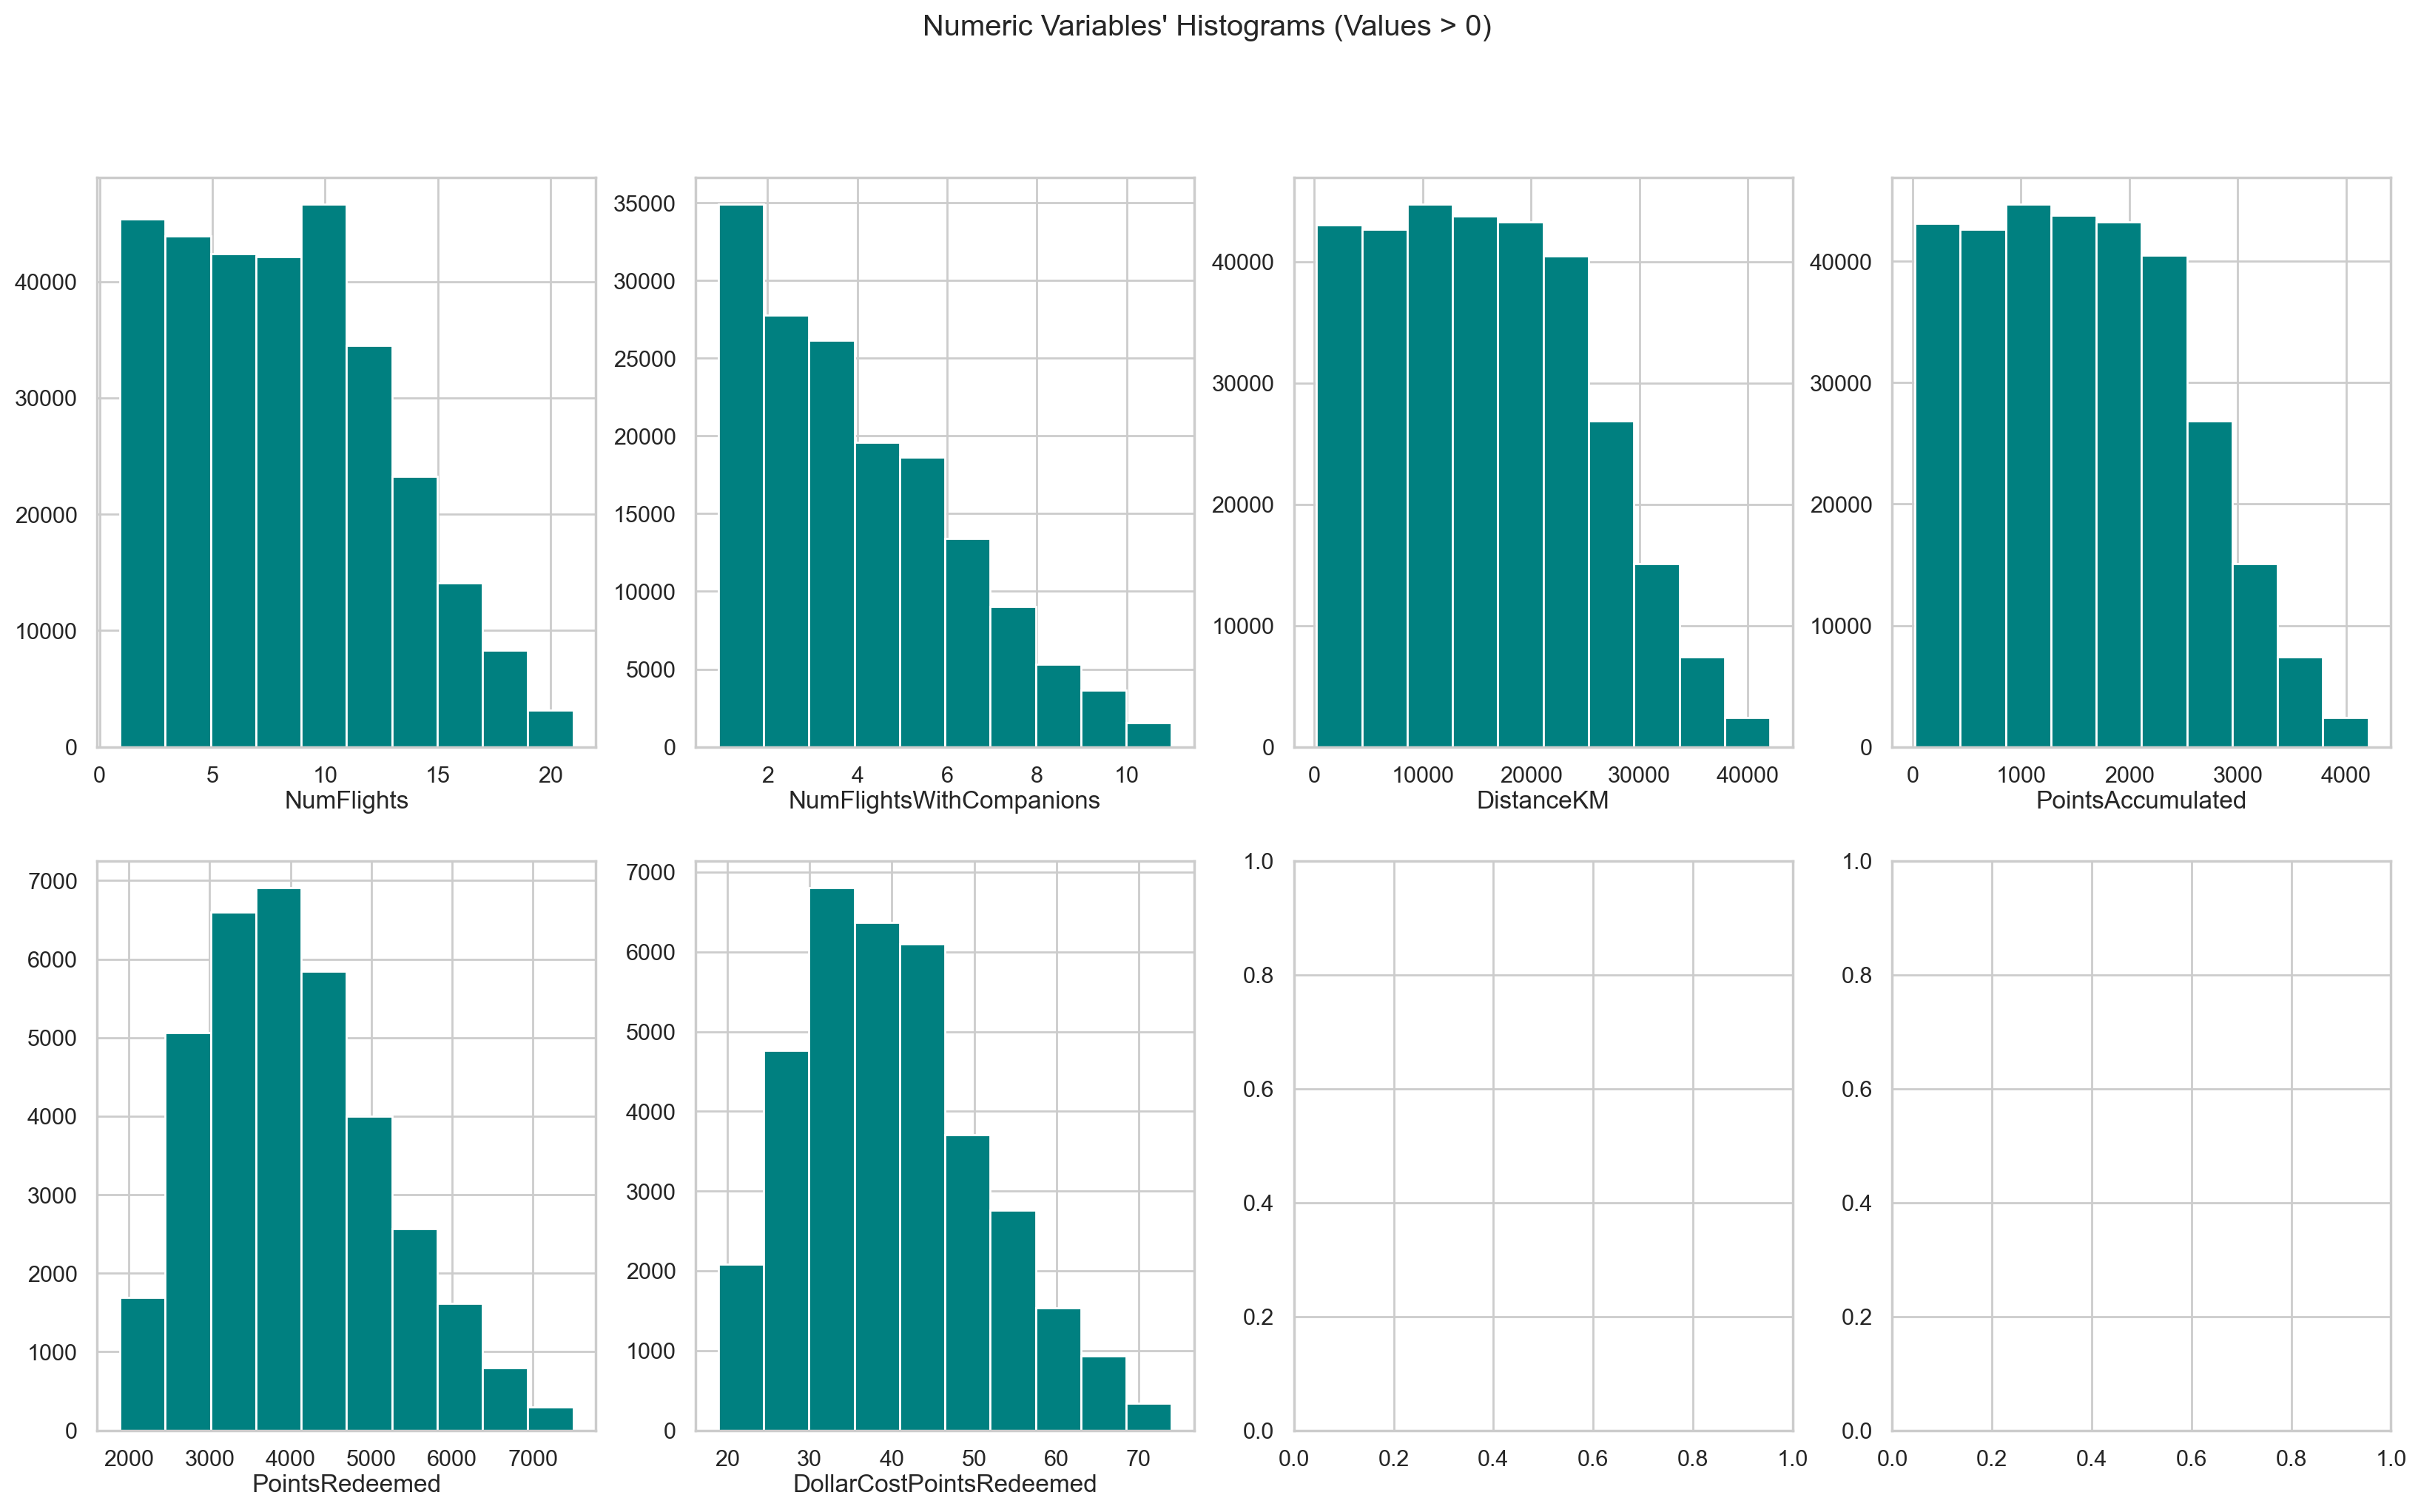

In [120]:
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data ax.hist(df_train[feat], color=("purple"))
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    df_flights_filtered = df_flights[df_flights[feat] > 0]
    ax.hist(df_flights_filtered[feat], color=("teal"))
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms (Values > 0)"

plt.suptitle(title)
plt.show()

<h2 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Box Plots
</h2>

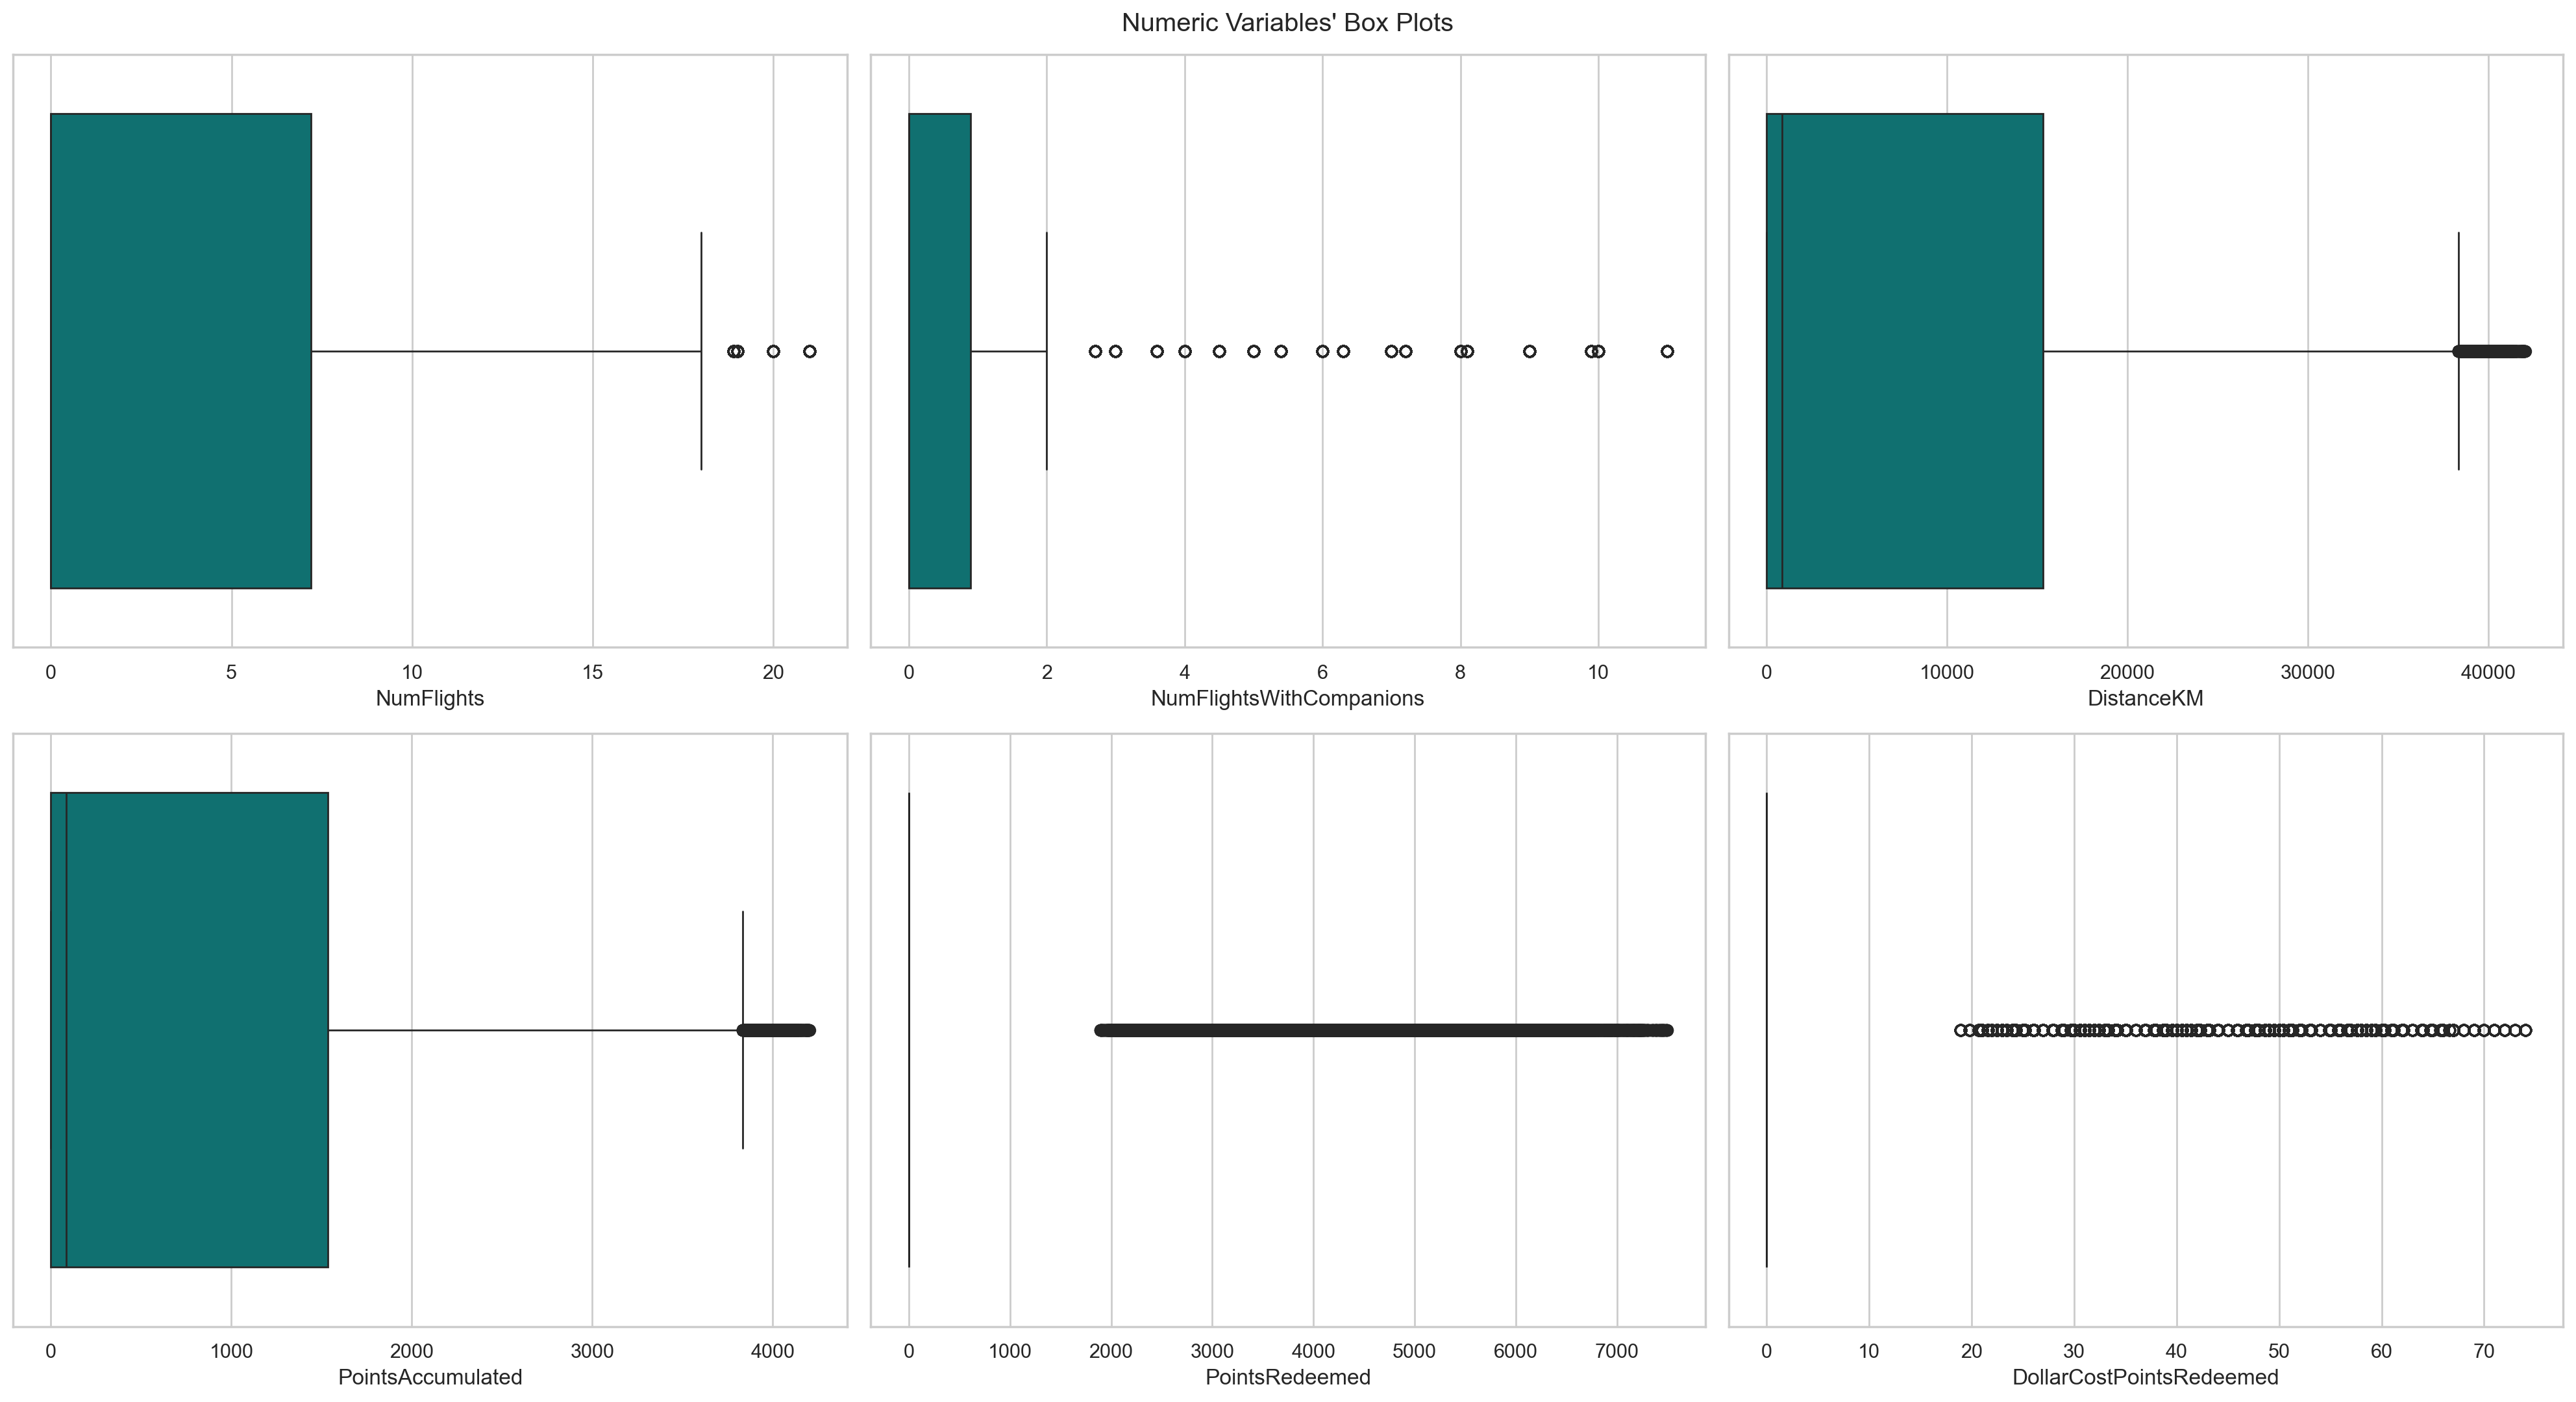

In [121]:
# Plot ALL Numeric Variables' BoxPlots in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")


## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram  
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_flights[feat], color=("teal"), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)
"""

plt.show()

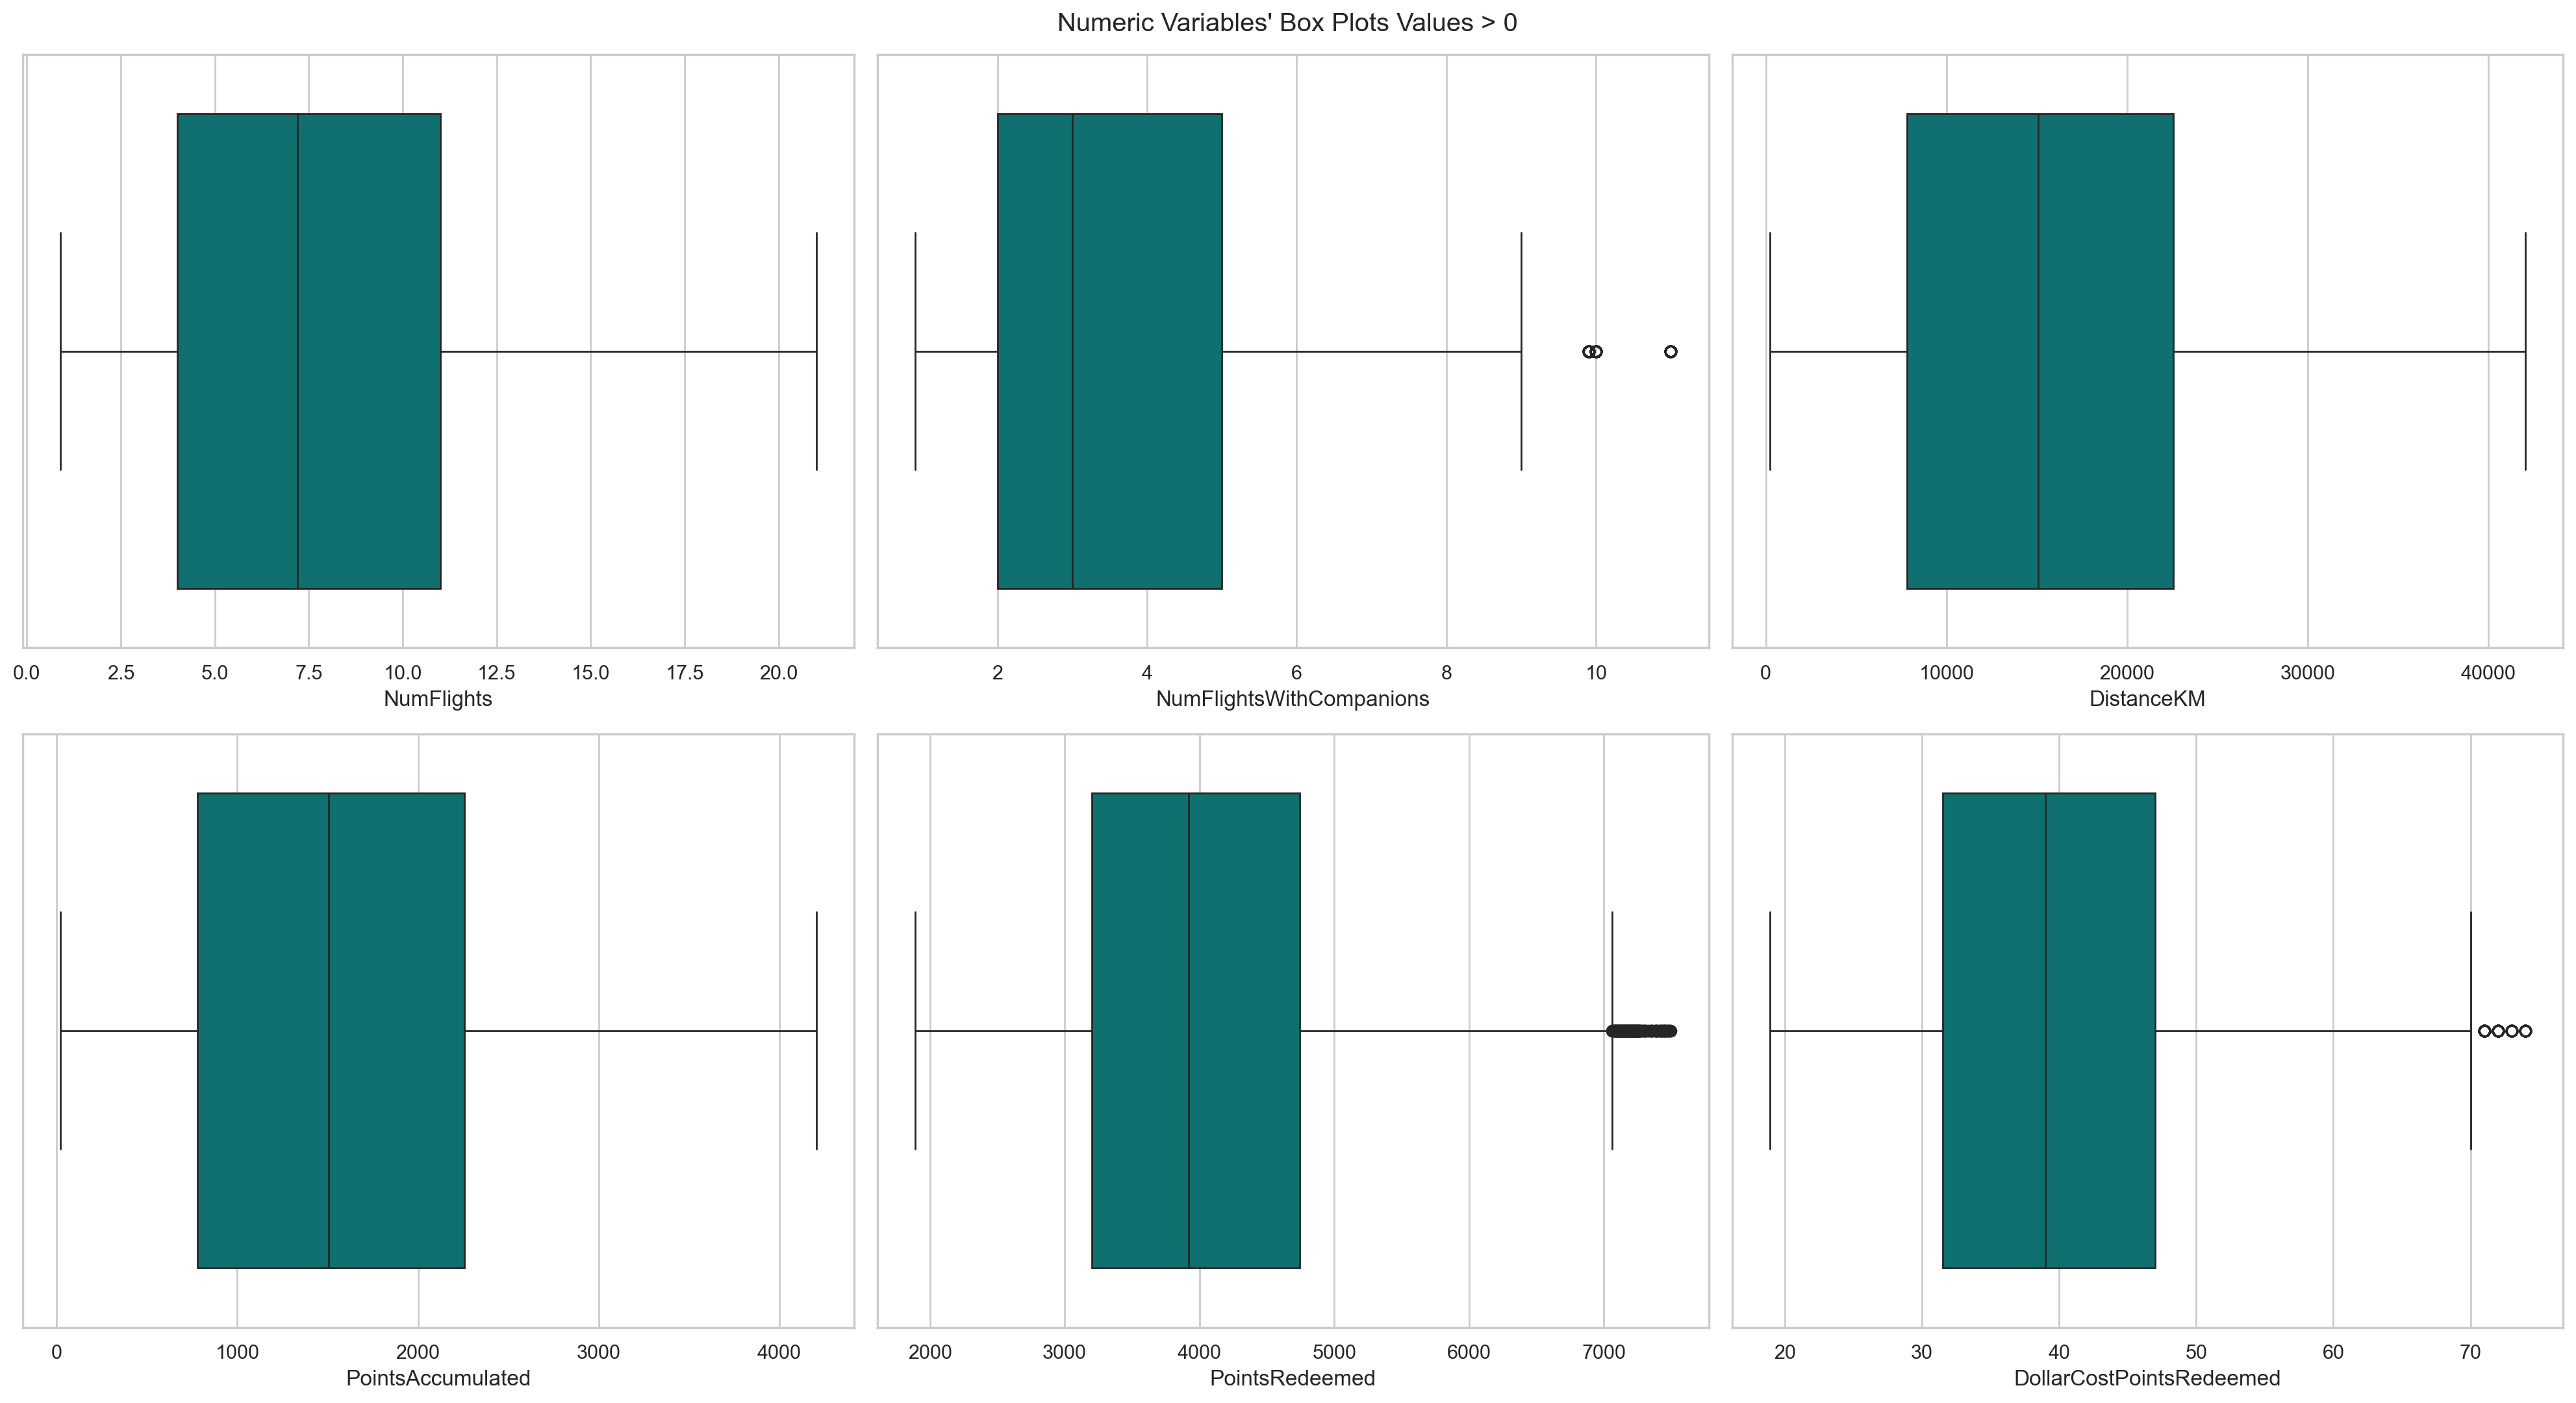

In [122]:
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")


## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram  
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    df_flights_filtered = df_flights[df_flights[feat] > 0]
    sns.boxplot(x=df_flights_filtered[feat], color=("teal"), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots Values > 0"

plt.suptitle(title)
plt.show()

<h2 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Pairwise Relationship
</h2>

In [123]:
'''
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_flights[metric_features], diag_kind="hist", plot_kws = {'color': 'teal'})

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
'''

'\n# Pairwise Relationship of Numerical Variables\nsns.set()\n\n# Setting pairplot\nsns.pairplot(df_flights[metric_features], diag_kind="hist", plot_kws = {\'color\': \'teal\'})\n\n# Layout\nplt.subplots_adjust(top=0.95)\nplt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)\n'

In [124]:
'''
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
df_flights_filtered = df_flights[df_flights[feat] > 0]
sns.pairplot(df_flights_filtered[metric_features], diag_kind="hist", plot_kws = {'color': 'teal'})

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
'''

'\n# Pairwise Relationship of Numerical Variables\nsns.set()\n\n# Setting pairplot\ndf_flights_filtered = df_flights[df_flights[feat] > 0]\nsns.pairplot(df_flights_filtered[metric_features], diag_kind="hist", plot_kws = {\'color\': \'teal\'})\n\n# Layout\nplt.subplots_adjust(top=0.95)\nplt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)\n'

In [125]:
# Filtering dataframe for NumFlights > 0
df_flights_filtered = df_flights[df_flights['NumFlights'] > 0]
df_flights_filtered

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.00,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.00,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.00,3213.0,32.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.00,0.0,0.0
5,486956,2021,12,2021-12-01,12.0,7.0,23967.0,2396.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608423,999524,2019,12,2019-12-01,13.5,4.5,22572.9,2257.29,0.0,0.0
608424,999550,2019,12,2019-12-01,8.1,0.0,18168.3,1816.83,0.0,0.0
608426,999631,2019,12,2019-12-01,3.6,1.8,12262.5,1226.25,0.0,0.0
608431,999902,2019,12,2019-12-01,7.2,0.0,30766.5,3076.65,0.0,0.0


In [126]:
# Getting a statistical summary of the filtered dataframe
df_flights_filtered.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
Loyalty#,303912.0,549006.106968,100018.0,326699.0,549551.5,771667.0,999986.0,258296.280653
Year,303912.0,2020.049593,2019.0,2019.0,2020.0,2021.0,2021.0,0.82507
Month,303912.0,6.64496,1.0,4.0,7.0,10.0,12.0,3.449283
YearMonthDate,303912,2020-07-08 15:28:36.275763968,2019-01-01 00:00:00,2019-10-01 00:00:00,2020-08-01 00:00:00,2021-04-01 00:00:00,2021-12-01 00:00:00,NaN
NumFlights,303912.0,7.824084,0.9,4.0,7.2,11.0,21.0,4.536193
NumFlightsWithCompanions,303912.0,1.96987,0.0,0.0,0.9,3.6,11.0,2.46906
DistanceKM,303912.0,15588.317563,238.5,7796.7,15058.0,22565.0,42040.0,9354.323646
PointsAccumulated,303912.0,1558.524642,23.85,779.04,1505.52,2256.0,4204.0,935.417209
PointsRedeemed,303912.0,470.977092,0.0,0.0,0.0,0.0,7496.0,1350.71243
DollarCostPointsRedeemed,303912.0,4.654352,0.0,0.0,0.0,0.0,74.0,13.360619


<h2 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Correlation Matrix
</h2>

Correlation between all variables with no alterations

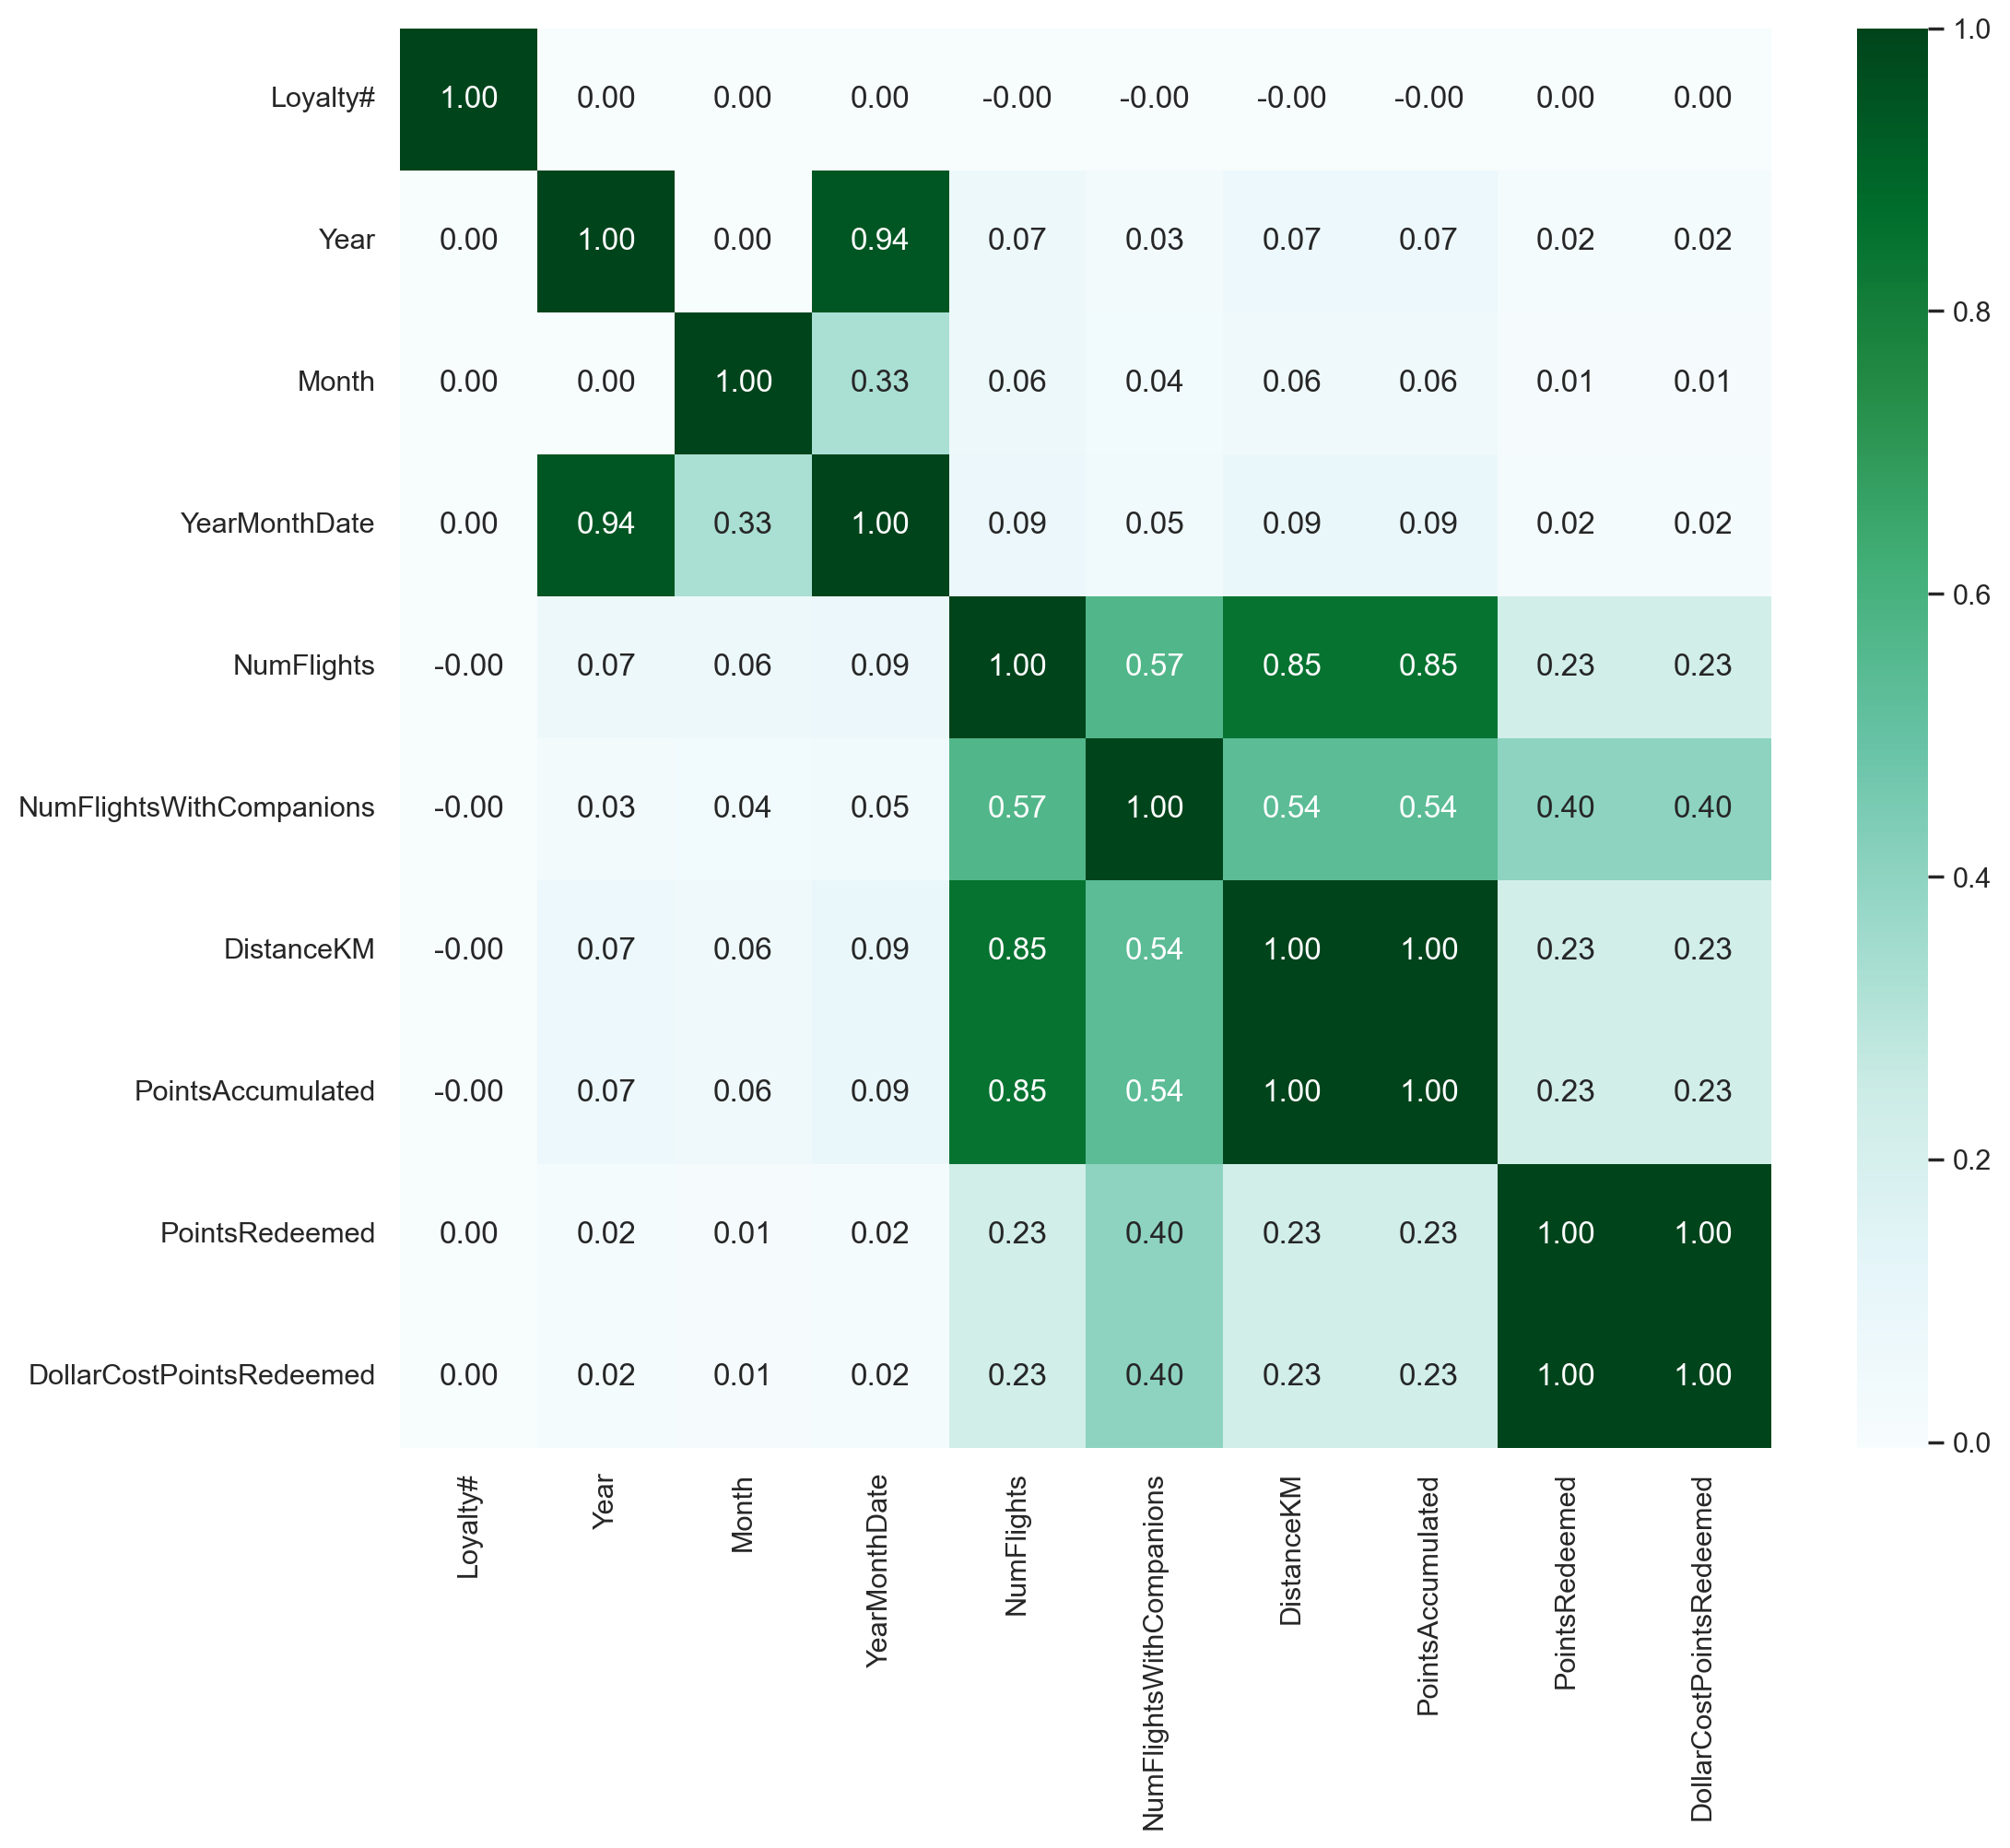

In [127]:
# Correlation Heatmap
cor_spearman = df_flights.corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.BuGn, fmt='.2f')
    plt.show()
cor_heatmap(cor_spearman)

Correlation between all variables from clients that have been on, at least, **1 flight**

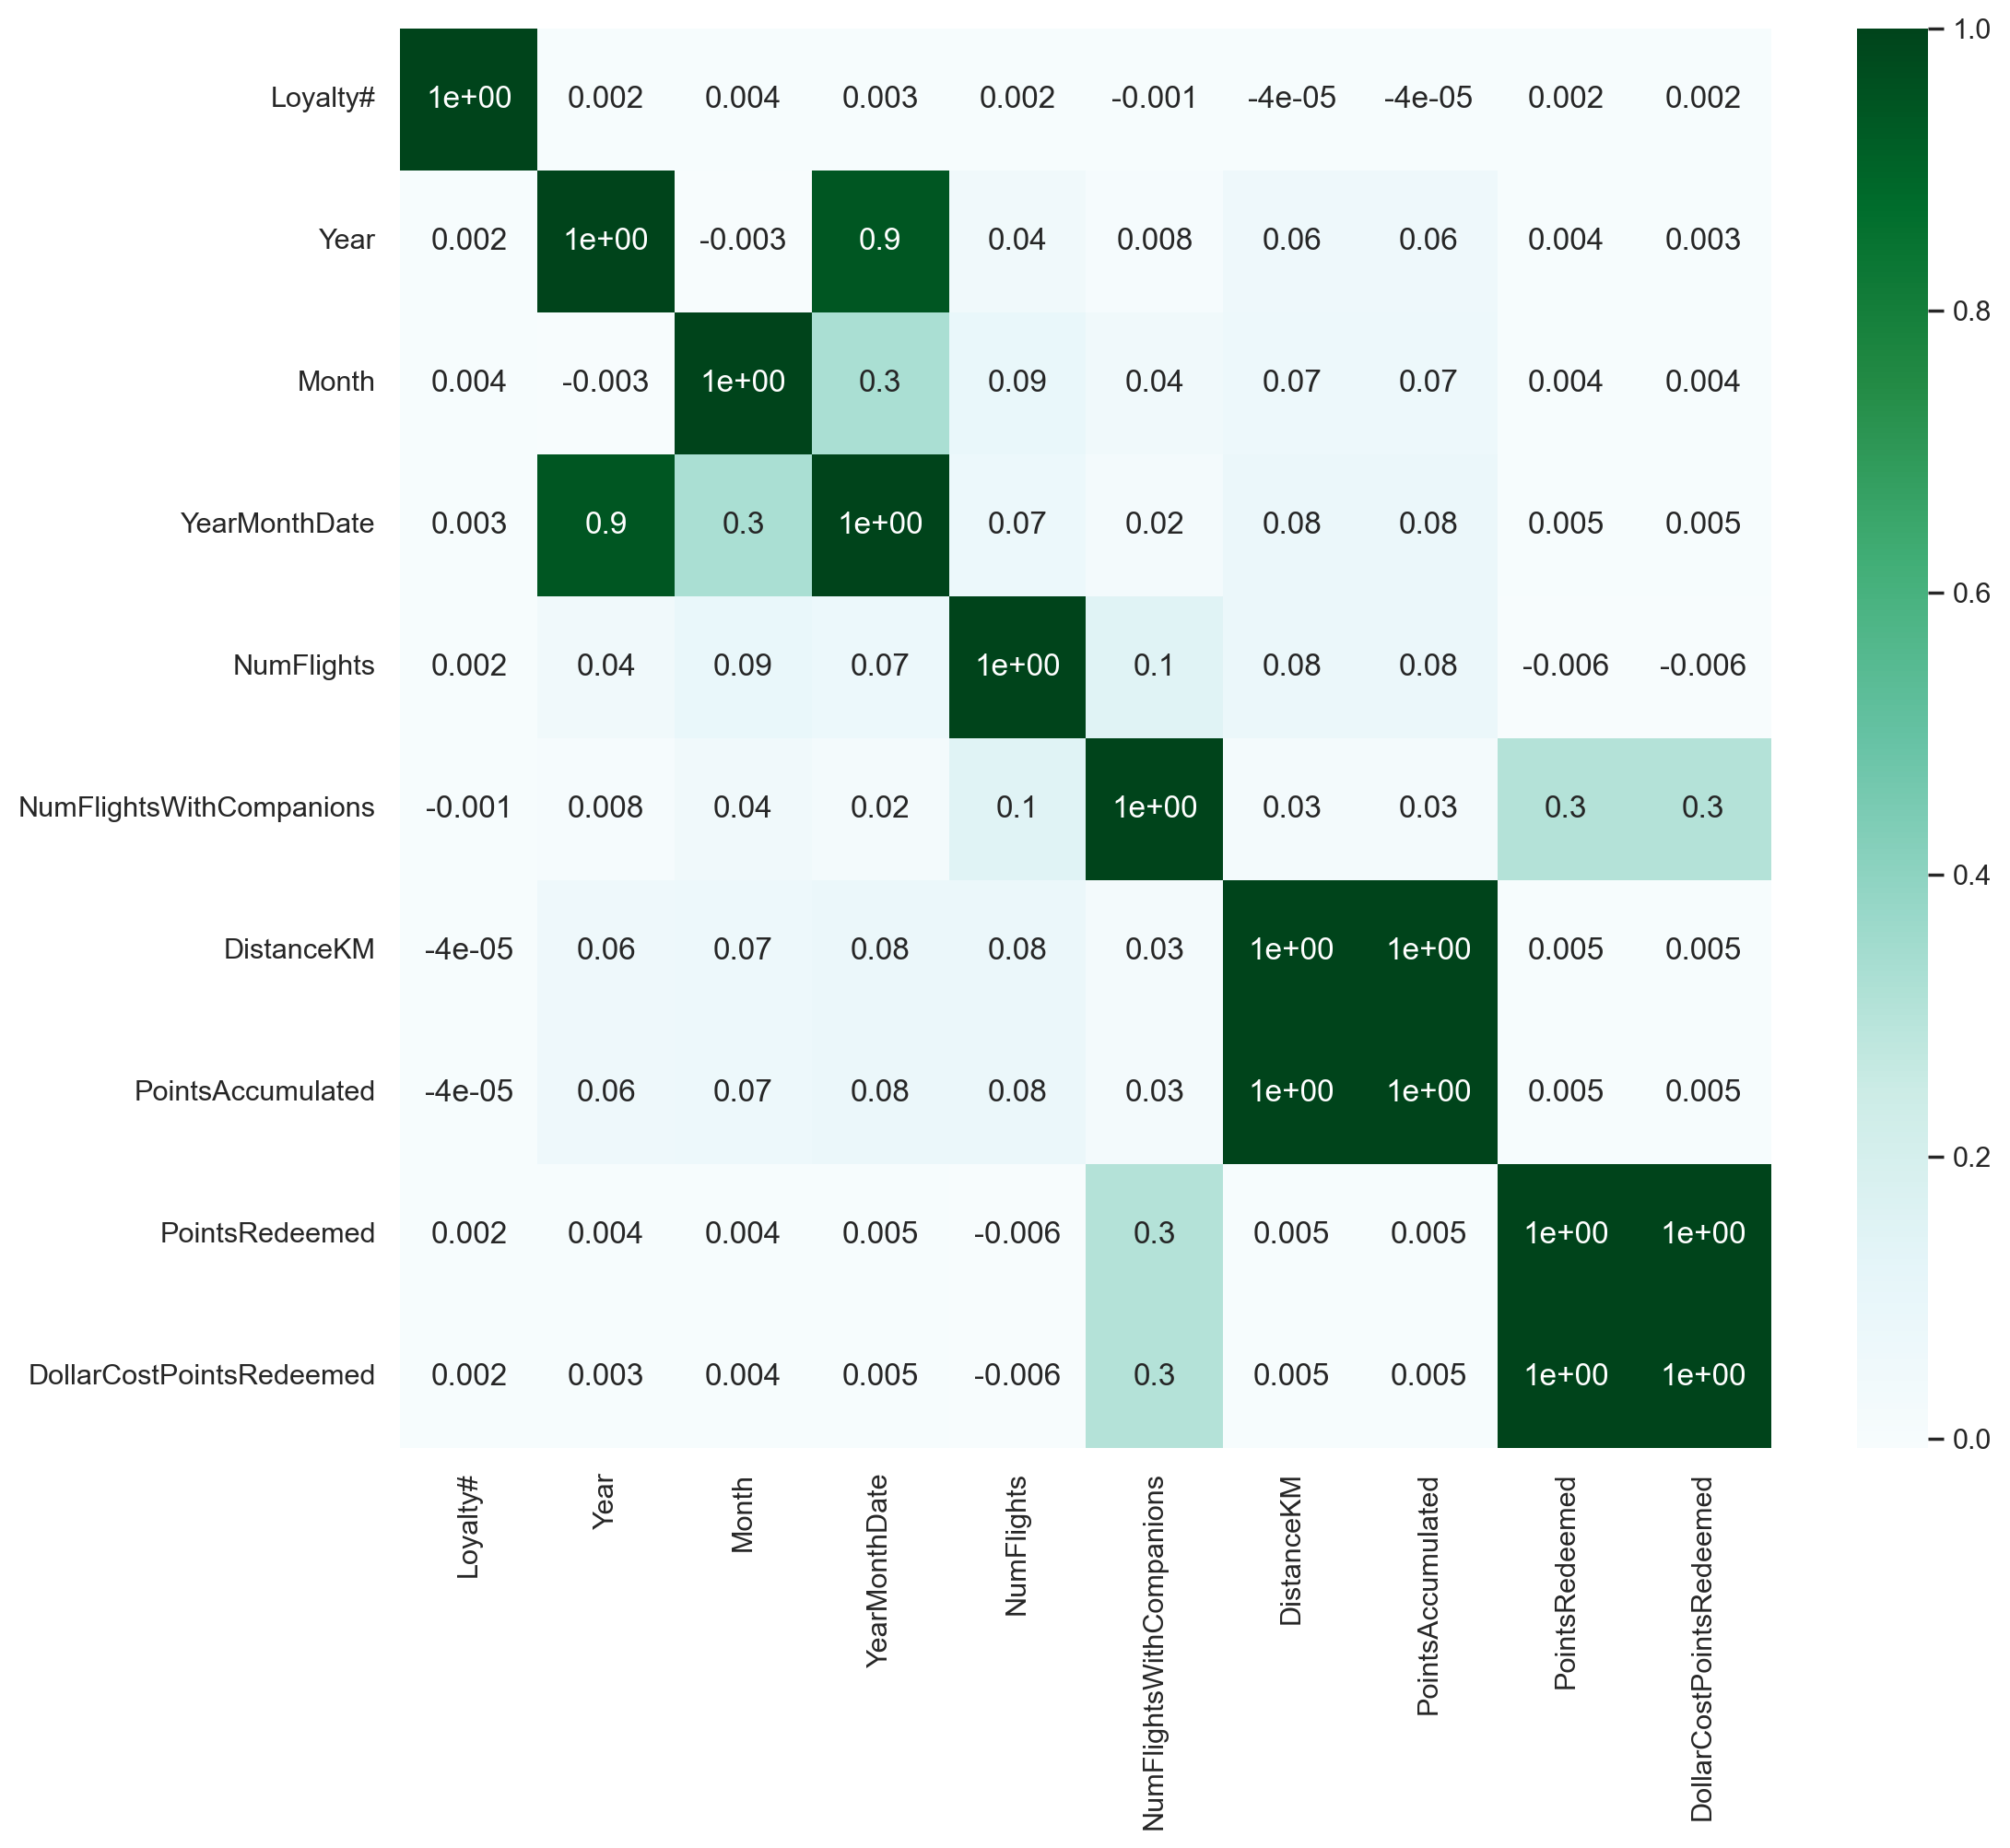

In [128]:
# Correlation Heatmap
cor_spearman = df_flights_filtered.corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.BuGn, fmt='.1')
    plt.show()
cor_heatmap(cor_spearman)

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Data Preprocessing
</h1>

### Missing Values

NAO EXISTEM MISSING VALUES NO DATASET

### Outliers

Our outlier analysis will be based on the sense of the values and not on them distribution.

In [129]:
df_flights[df_flights['NumFlights'] < df_flights['NumFlightsWithCompanions']]
# There are no outliers detected based on our criteria.

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


In [130]:
df_flights[(df_flights['NumFlights'] == 0) & (df_flights['DistanceKM'] > 0)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
19,261109,2021,12,2021-12-01,0.0,0.0,13736.0,1373.00,0.0,0.0
93,817609,2021,12,2021-12-01,0.0,0.0,23775.0,2377.00,0.0,0.0
96,192600,2021,12,2021-12-01,0.0,0.0,5119.0,511.00,0.0,0.0
116,883242,2021,12,2021-12-01,0.0,0.0,20681.0,2068.00,0.0,0.0
154,493800,2021,12,2021-12-01,0.0,0.0,17502.0,1750.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
607387,944702,2019,12,2019-12-01,0.0,0.0,29223.0,2922.30,0.0,0.0
607549,952629,2019,12,2019-12-01,0.0,0.0,27342.9,2734.29,0.0,0.0
607594,954973,2019,12,2019-12-01,0.0,0.0,6436.8,643.68,0.0,0.0
607744,962989,2019,12,2019-12-01,0.0,0.0,15922.8,1592.28,0.0,0.0


### Feature Engineering 

In [131]:
# Creating new features
# Points Redeem Ratio
df_flights["PointsRedeemRatio"] = df_flights["PointsRedeemed"] / df_flights["PointsAccumulated"]

# Flights With Companions Ratio
df_flights["FlightsWithCompanionsRatio"] = df_flights["NumFlightsWithCompanions"] / df_flights["NumFlights"]

# Recency of the customer
reference_date = df_flights['YearMonthDate'].max() # defining current date

# date of the LAST flight for each customer
recency_df = df_flights[df_flights['NumFlights'] > 0].groupby('Loyalty#')['YearMonthDate'].max().reset_index()

# difference in months between the last flight and the the current date
df_flights['Recency_Months'] = (reference_date.year - recency_df['YearMonthDate'].dt.year) * 12 + \
                               (reference_date.month - recency_df['YearMonthDate'].dt.month)

### Feature Selection

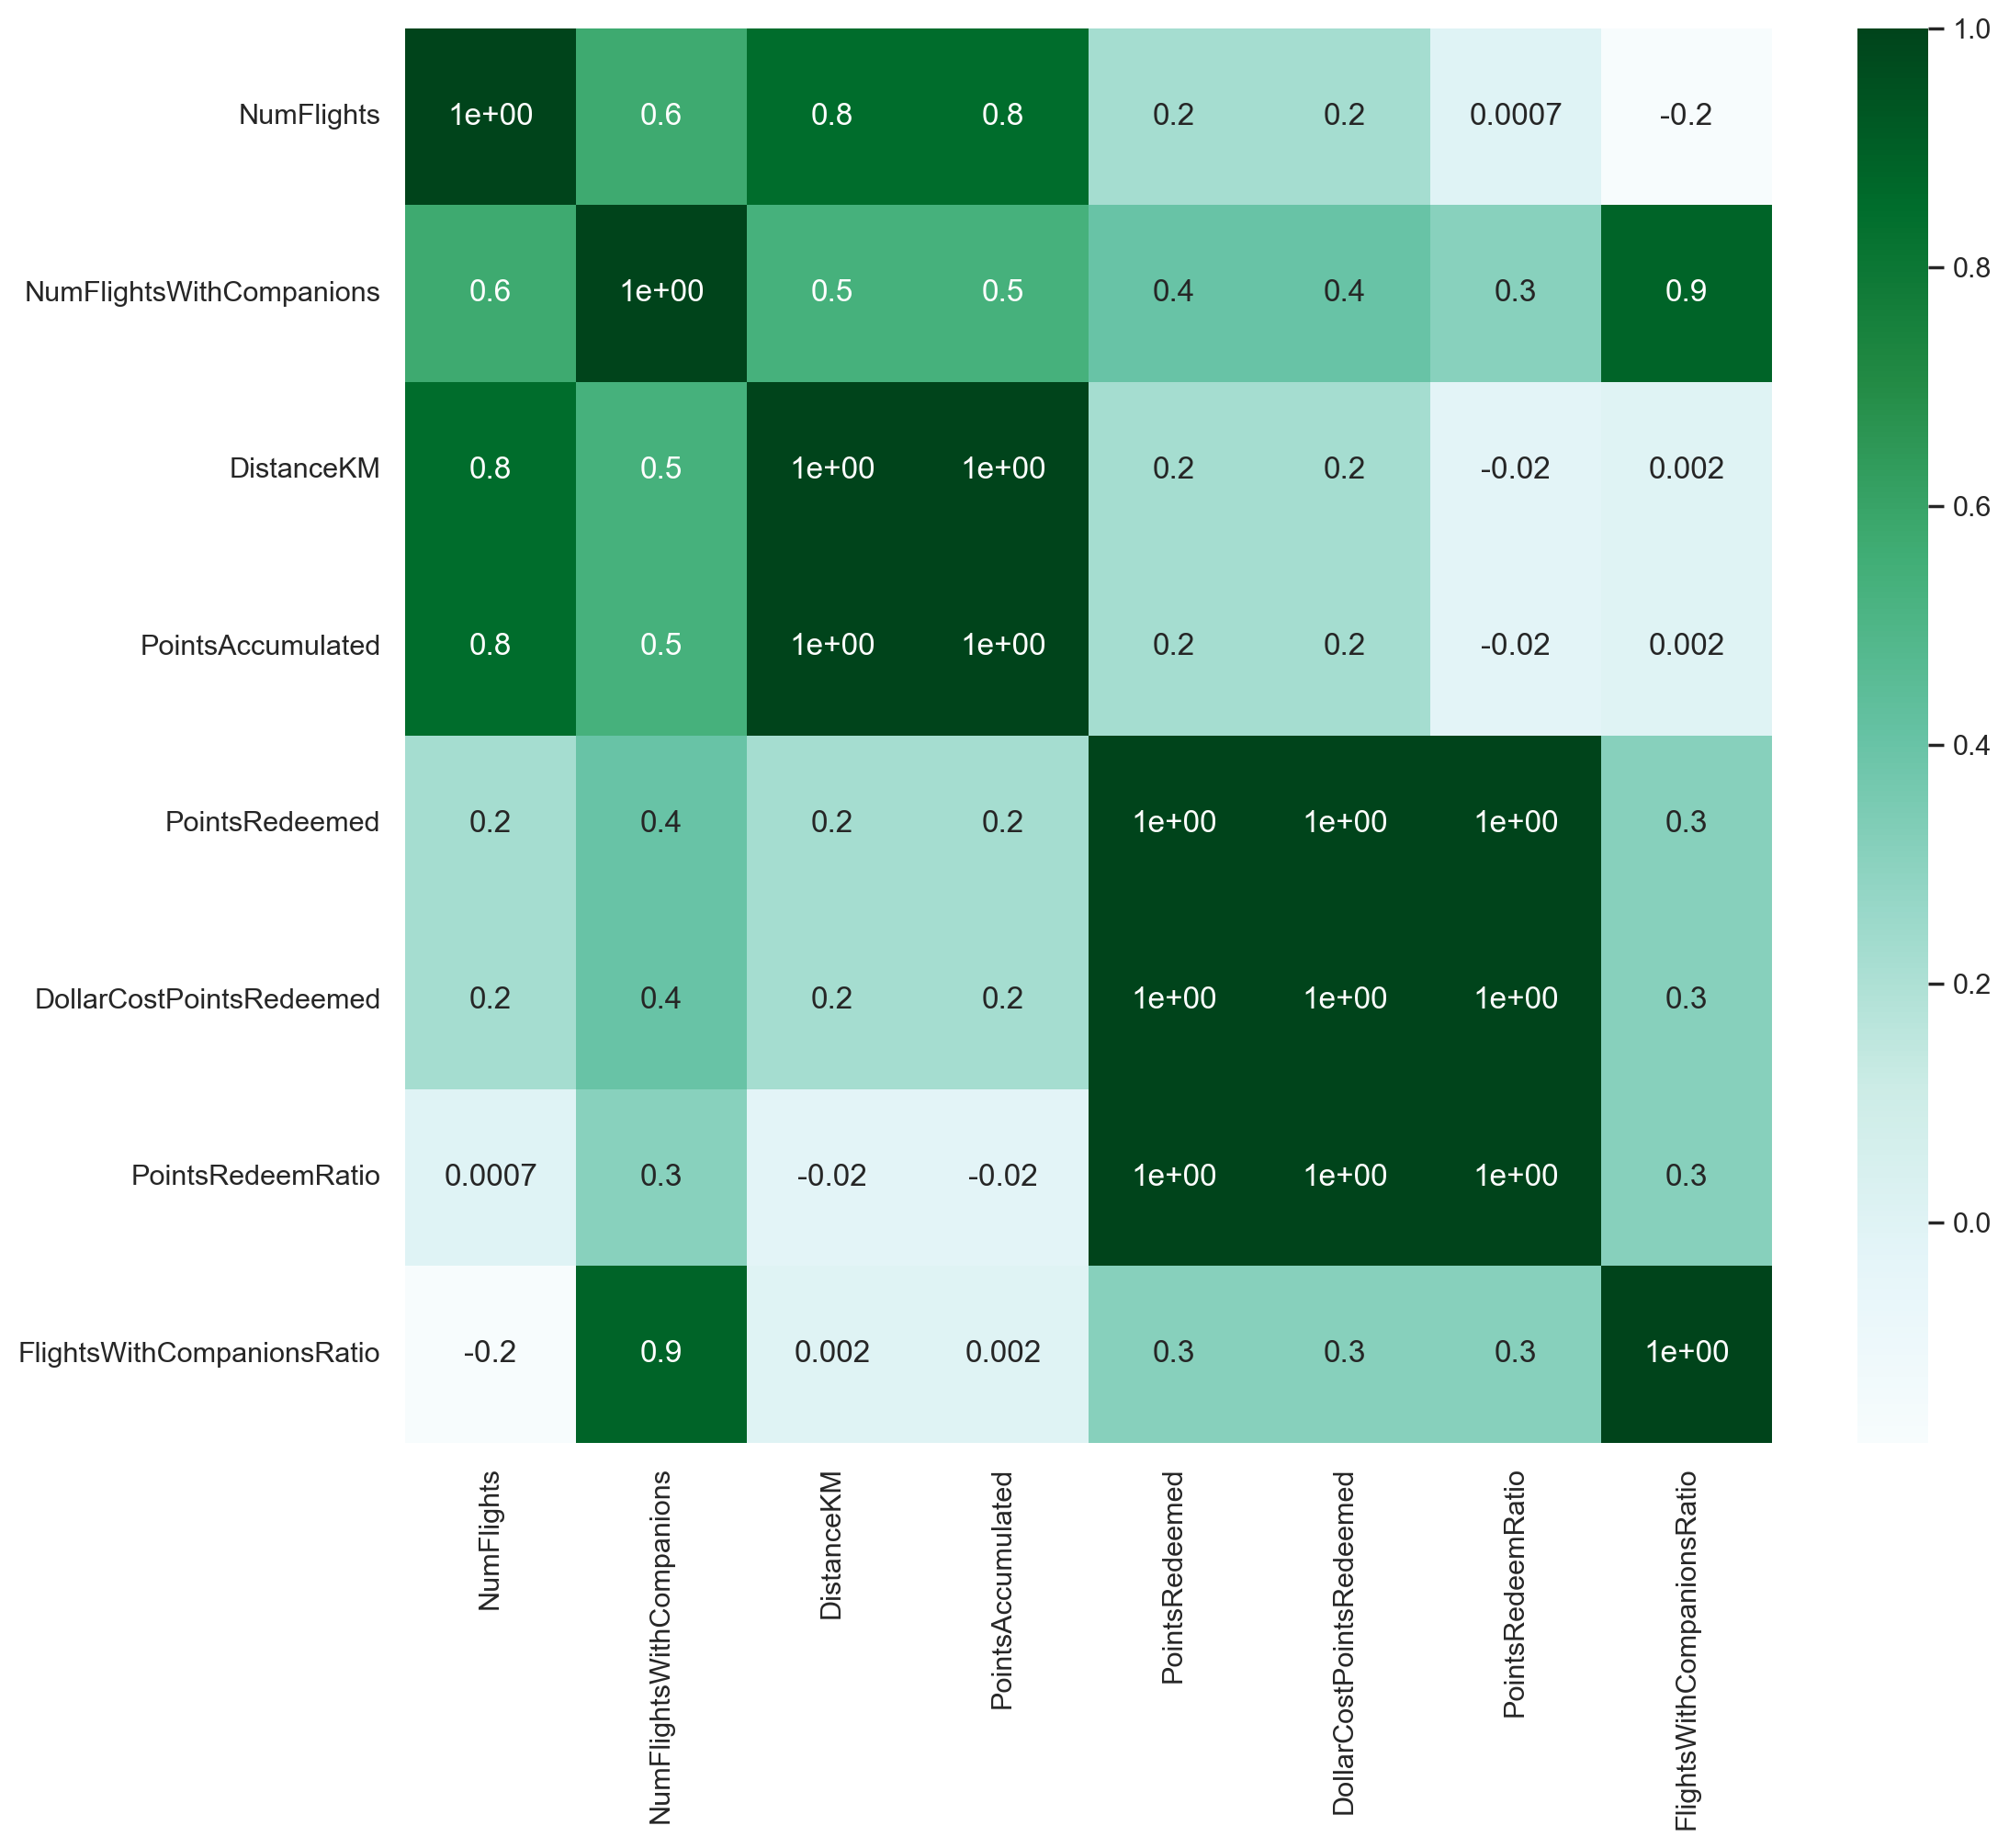

In [132]:
# Updated Correlation Heatmap with new features
metric_features = [
    "NumFlights", "NumFlightsWithCompanions", "DistanceKM",
    "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"
] 

metric_features.append("PointsRedeemRatio")
metric_features.append("FlightsWithCompanionsRatio")

new_cor_spearman = df_flights[metric_features].corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.BuGn, fmt='.1')
    plt.show()
cor_heatmap(new_cor_spearman)

### Data Correction

First change is dropping the columns `Year` and `Month` as this information is known through the variable `YearMonthDate` (also there's a strong correalation between `Year` and `YearMonthDate`).

In [133]:
df_flights = df_flights.drop(columns=["Year", "Month"])

Now, let's change the datatype for the variables `NumFlights` as well as `NumFlightsWithCompanions` to an integer.

In [134]:
df_flights["NumFlights"] = df_flights["NumFlights"].astype(int)
df_flights["NumFlightsWithCompanions"] = df_flights["NumFlightsWithCompanions"].astype(int)
df_flights

,Loyalty#,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,PointsRedeemRatio,FlightsWithCompanionsRatio,Recency_Months
0,413052,2021-12-01,2,2,9384.0,938.00,0.0,0.0,0.000000,1.0000,0.0
1,464105,2021-12-01,0,0,0.0,0.00,0.0,0.0,NaN,NaN,0.0
2,681785,2021-12-01,10,3,14745.0,1474.00,0.0,0.0,0.000000,0.3000,1.0
3,185013,2021-12-01,16,4,26311.0,2631.00,3213.0,32.0,1.221209,0.2500,0.0
4,216596,2021-12-01,9,0,19275.0,1927.00,0.0,0.0,0.000000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019-12-01,7,0,30766.5,3076.65,0.0,0.0,0.000000,0.0000,NaN
608432,999911,2019-12-01,0,0,0.0,0.00,0.0,0.0,NaN,NaN,NaN
608433,999940,2019-12-01,14,0,18261.0,1826.10,0.0,0.0,0.000000,0.0625,NaN
608434,999982,2019-12-01,0,0,0.0,0.00,0.0,0.0,NaN,NaN,NaN


By analysing our heatmaps from the initial analysis, there's 2 pairs of variables showing a strong correlation between themselves: 
- `DistanceKM` and `PointsAccumulated`
- `PoinstsRedeemed` and `DollarCostPoinstsRedeemed`

Our objective is to analyse AIAI customer loyalty membership data, therefore we have decided to keep `PointsAccumulated` as this variable shows future engagement with the customer as well as potential company's liability, while `DistanceKM` is merely a measure. We'll also keep `PoinstsRedeemed` to continue with our analysis, comparable to previous chosen variable, it will apprise how successful the engagement was, revealing customer's intent.

In [135]:
df_flights = df_flights.drop(columns=["DistanceKM", "DollarCostPointsRedeemed"])

We are lso removing `PointsRedeemed` and keeping `PointsRedeemedRatio` as the latter captures the customer's engagement better. For the same reason we will keep `FlightWithCompanionsRatio`

In [137]:
df_flights = df_flights.drop(columns=["PointsRedeemed", "NumFlightsWithCompanions"])

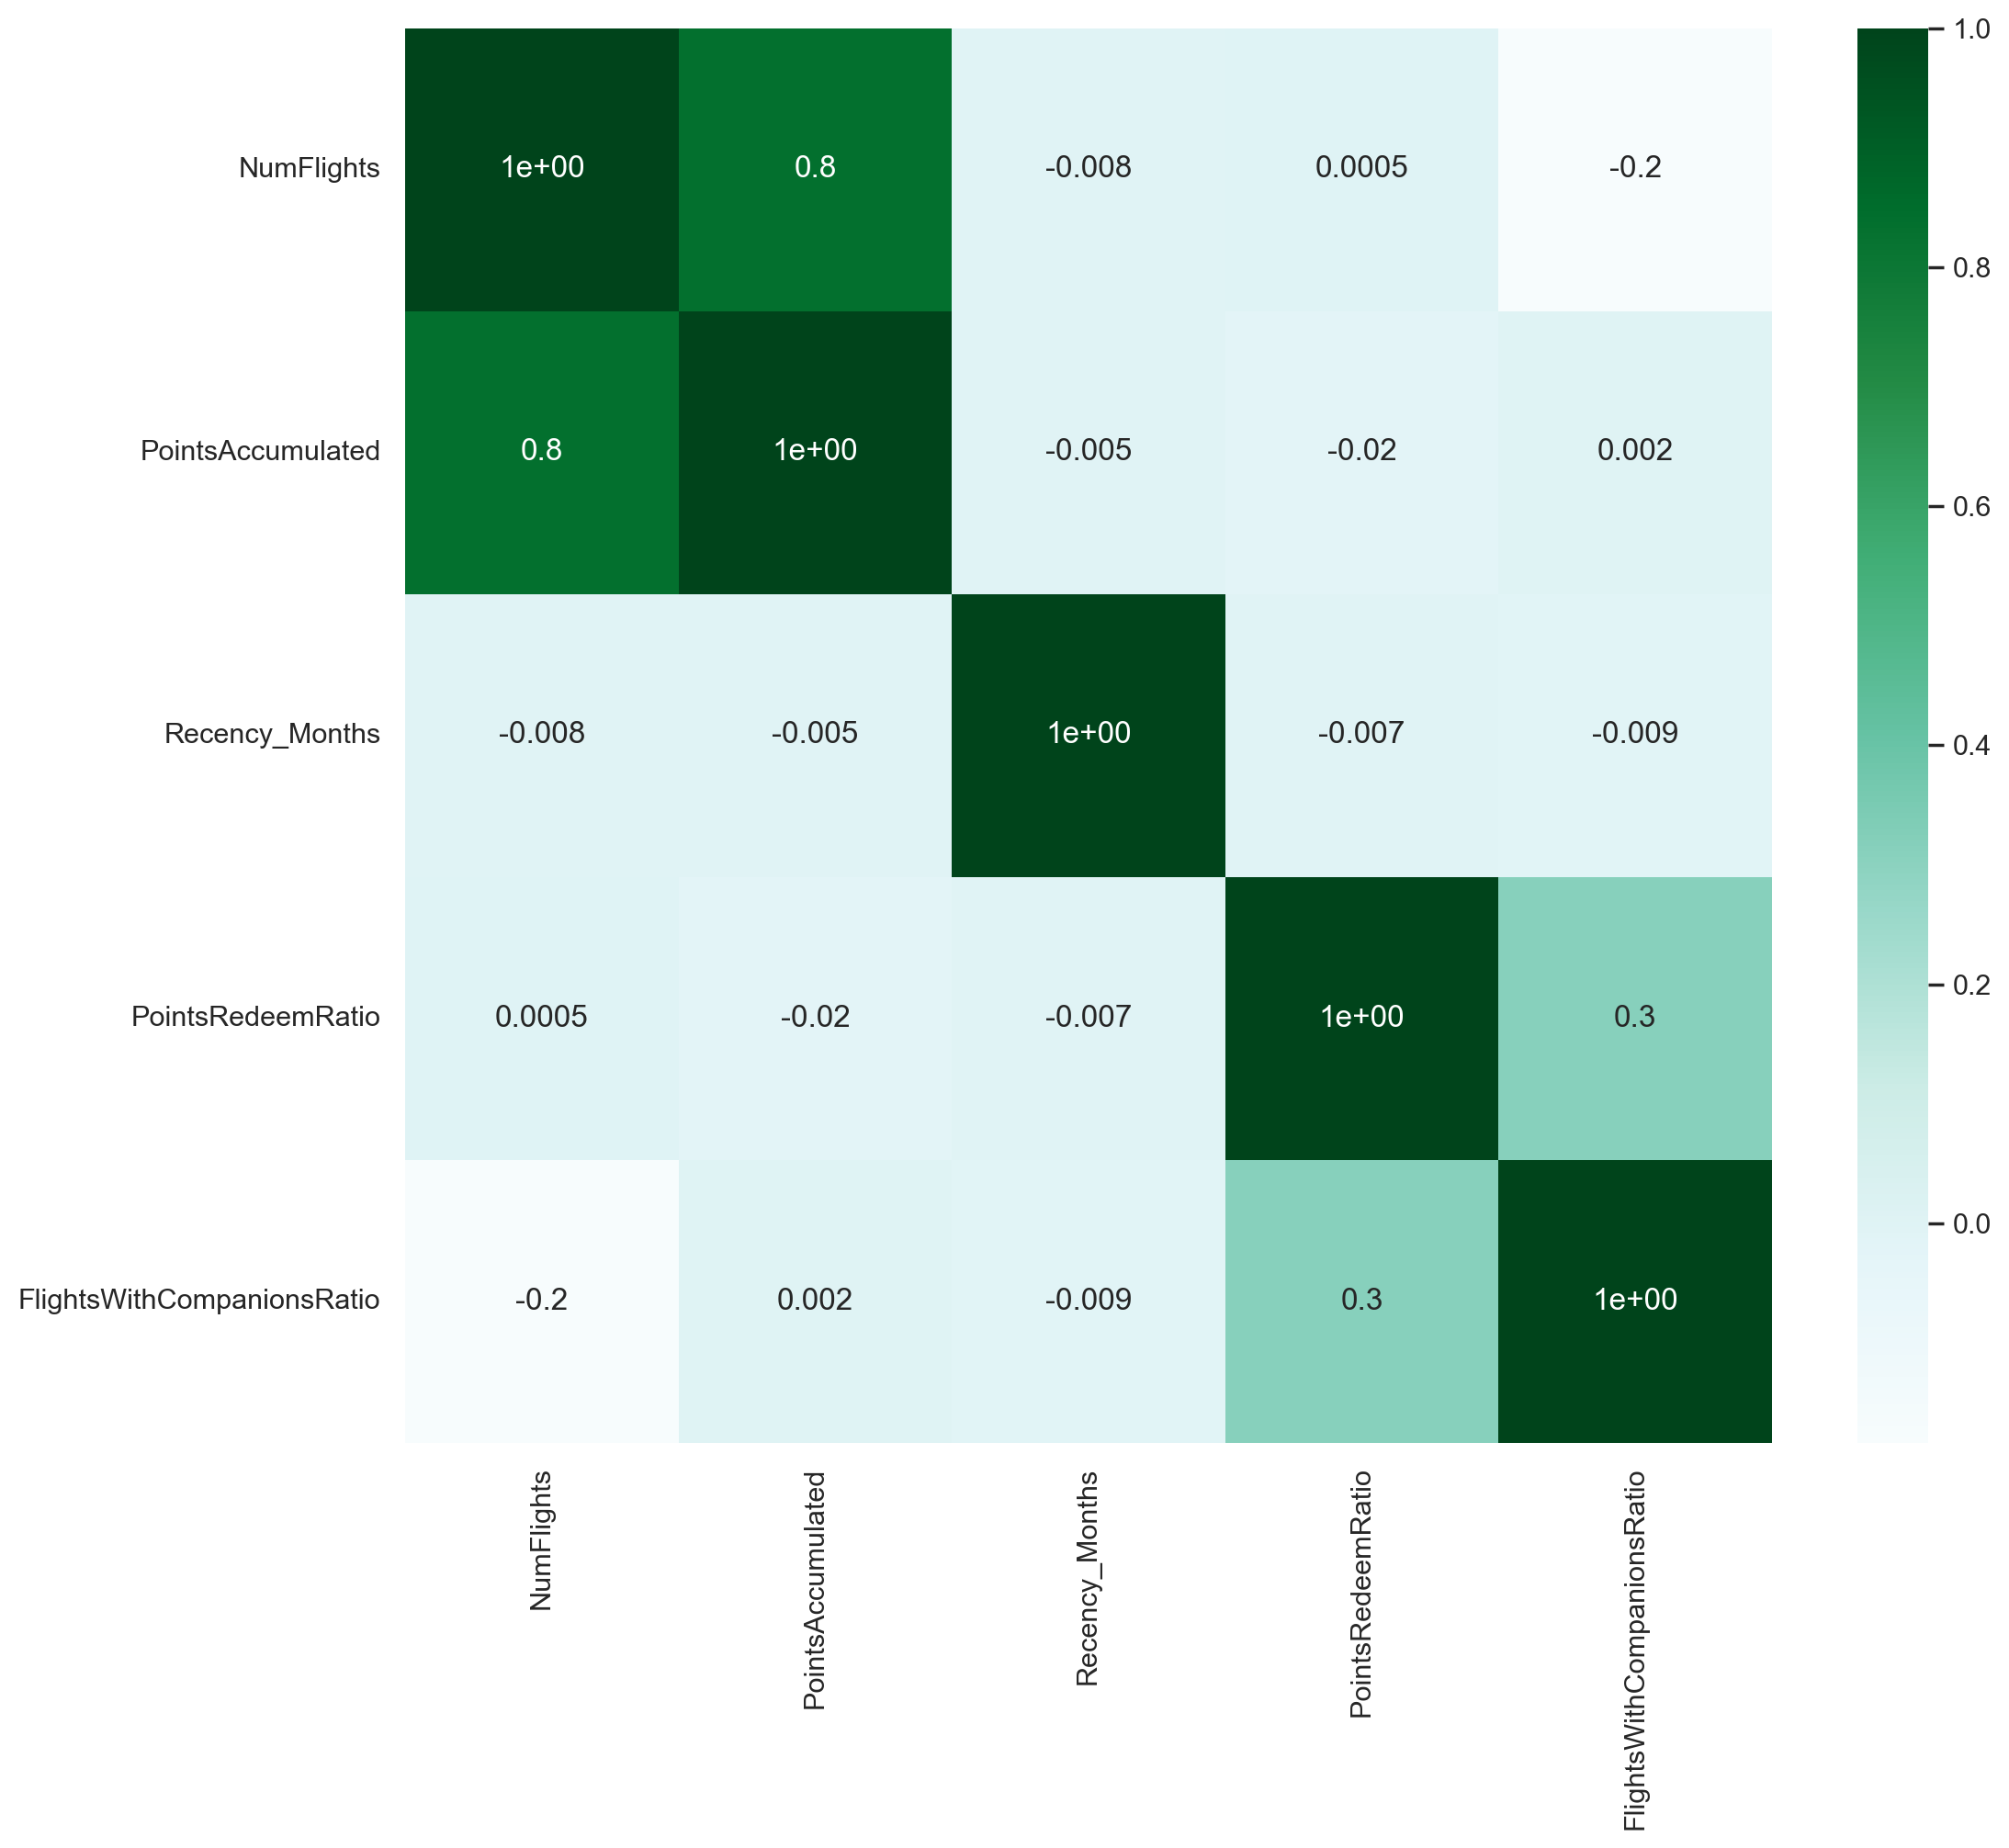

In [139]:
# Updated Correlation Heatmap with new features
metric_features = [
    "NumFlights", 
    "PointsAccumulated", "Recency_Months", "PointsRedeemRatio", "FlightsWithCompanionsRatio"
]

new_cor_spearman = df_flights[metric_features].corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.BuGn, fmt='.1')
    plt.show()
cor_heatmap(new_cor_spearman)

In [ ]:
df_flights = df_flights.groupby("Loyalty#").agg({
    "NumFlights": "sum",
    "NumFlightsWithCompanions": "sum",
    "PointsAccumulated": "sum",
    "PointsRedeemRatio": "sum",
    "FlightsWithCompanionsRatio": "sum",
    "Recency_Months": "sum"
}).reset_index()

In [ ]:
df_flights.to_csv("DM_AIAI_FlightsDB_after_eda.csv", index=False)

In [ ]:
df_flights

LOWKEY PODEMOS FAZER DROP DOS POINTS ACCUMULATED ouNAO?

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Clustering 
</h1>